## Library

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

In [3]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score,adjusted_rand_score

## Question 

In [4]:
url = 'https://raw.githubusercontent.com/PratheepaJ/datasets/master/banknote.csv'
banknote = pd.read_csv(url)
banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Status    200 non-null    object 
 1   Length    200 non-null    float64
 2   Left      200 non-null    float64
 3   Right     200 non-null    float64
 4   Bottom    200 non-null    float64
 5   Top       200 non-null    float64
 6   Diagonal  200 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.1+ KB


In [5]:
banknote.head(5)

,Status,Length,Left,Right,Bottom,Top,Diagonal
0,genuine,214.8,131.0,131.1,9.0,9.7,141.0
1,genuine,214.6,129.7,129.7,8.1,9.5,141.7
2,genuine,214.8,129.7,129.7,8.7,9.6,142.2
3,genuine,214.8,129.7,129.6,7.5,10.4,142.0
4,genuine,215.0,129.6,129.7,10.4,7.7,141.8


In [6]:
stat = banknote[['Status']]

There are 7 variables in total: status (genuine or not), length of bill, left and right edges widths, top and bottom widths, length of diagonal.

In [7]:
banknote = banknote.drop(['Status'], axis = 1)
banknote.head(5)

,Length,Left,Right,Bottom,Top,Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


In [8]:
banknote.mean()

Length      214.8960
Left        130.1215
Right       129.9565
Bottom        9.4175
Top          10.6505
Diagonal    140.4835
dtype: float64

In [9]:
banknote.var()

Length      0.141793
Left        0.130339
Right       0.163274
Bottom      2.086878
Top         0.644723
Diagonal    1.327716
dtype: float64

Variable 'bottom' has the largest variance. As such, it will have greater impact on the principle components/a strong influence on the calculation of principal components. High variance can also affect clustering algorithms, in which case the variable can greatly influence the determination of cluster centroids. It might also indicate outliers in the dataset.

In [10]:
bank = pd.DataFrame(scale(banknote), index=banknote.index, columns=banknote.columns)
bank.var()

Length      1.005025
Left        1.005025
Right       1.005025
Bottom      1.005025
Top         1.005025
Diagonal    1.005025
dtype: float64

In [11]:
km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(bank)
km1.labels_

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [12]:
# K = 2
cluster_labels_km1 = km1.fit_predict(bank)
silhouette_score(bank, cluster_labels_km1).round(2)


0.38

In [13]:
#K=3
km2 = KMeans(n_clusters=3, n_init=20, random_state=0)
km2.fit(bank)
km2.labels_

array([2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [14]:
cluster_labels_km2 = km2.fit_predict(bank)
silhouette_score(bank, cluster_labels_km2).round(2)

0.33

In [15]:
#K=4
km3 = KMeans(n_clusters=4, n_init=20, random_state=0)
km3.fit(bank)
km3.labels_

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 2, 0, 0, 3, 0, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 3], dtype=int32)

In [16]:
cluster_labels_km3 = km3.fit_predict(bank)
silhouette_score(bank, cluster_labels_km3).round(2)

0.27

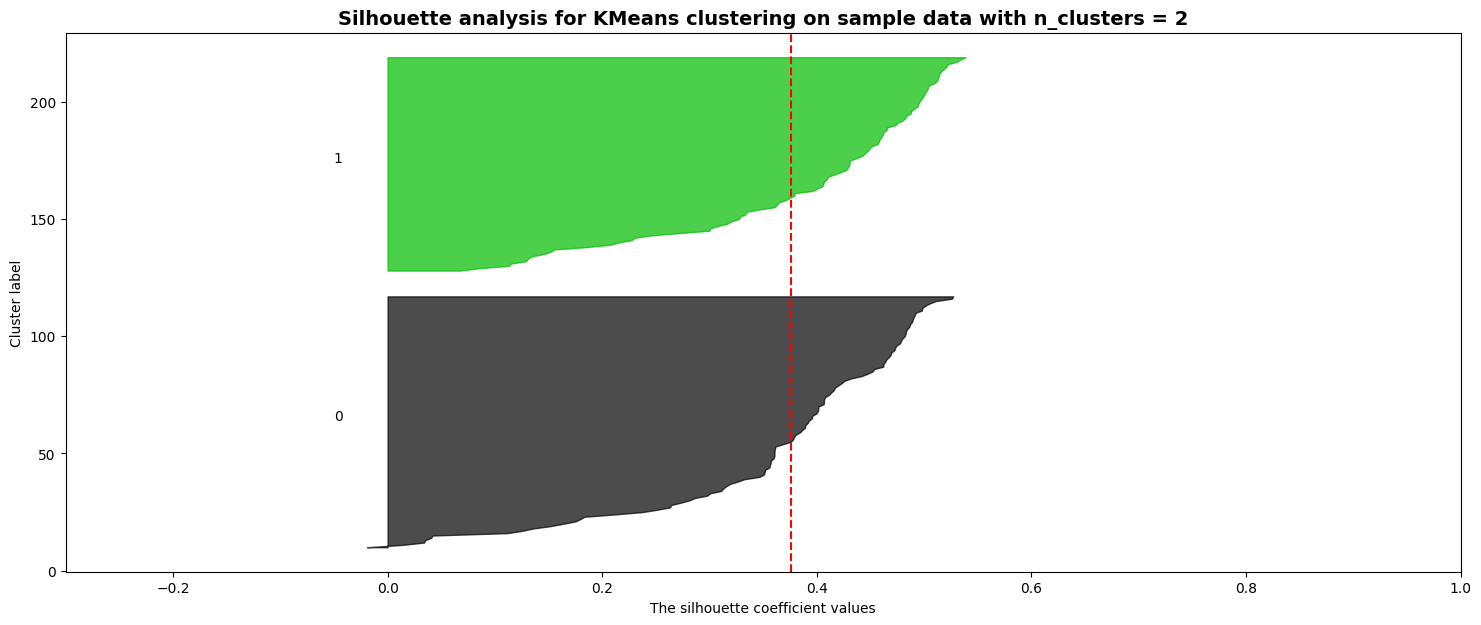

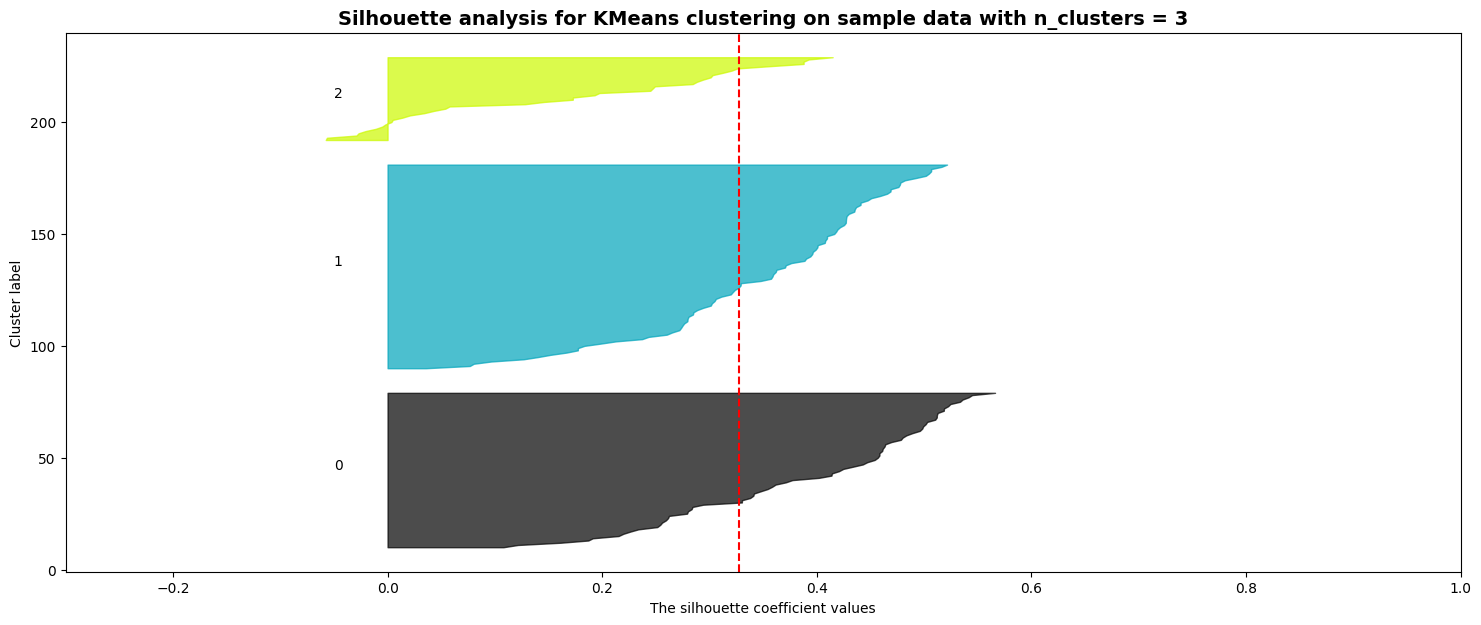

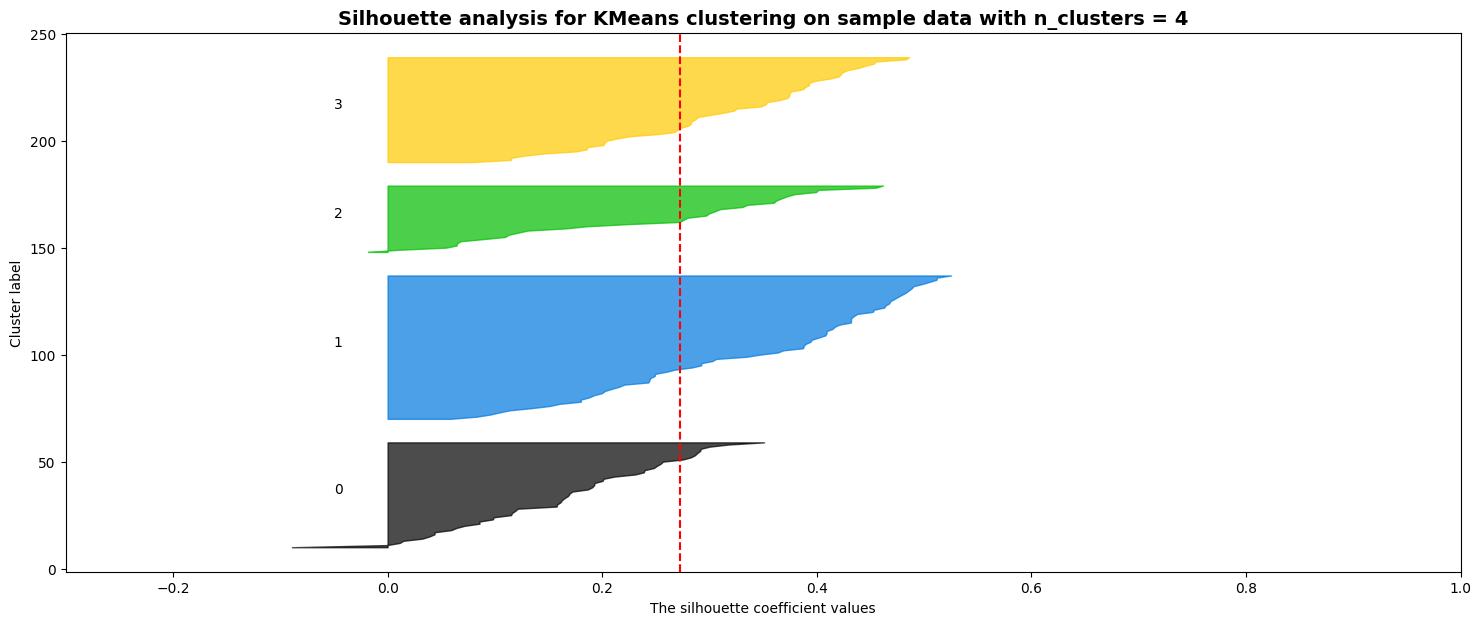

In [17]:
range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(bank)
    # average silhouette score
    silhouette_avg_km = silhouette_score(bank, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(bank, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next cluster silhouette scores
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Choose k=2 because it has the largest average silhouette score, as well as the most balance number of samples in clusters comparing to k=3 or 4.

In [18]:
# K = 2
km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(bank)

pd.Series(km1.labels_).value_counts()

0    108
1     92
Name: count, dtype: int64

There are 108 observations in one cluster and 92 in another for k=2.

In [19]:
pca = PCA()

In [20]:
#Loading vect

pca_loadings = pd.DataFrame(pca.fit(bank).components_.T, index=banknote.columns, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6'])
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Length,0.006987,0.815495,-0.017681,-0.574617,-0.058796,0.031057
Left,-0.467758,0.341967,0.103383,0.394923,0.639496,-0.297748
Right,-0.486679,0.252459,0.123475,0.430278,-0.614097,0.349153
Bottom,-0.406758,-0.266229,0.583538,-0.403674,-0.215476,-0.462354
Top,-0.367891,-0.091487,-0.787571,-0.110227,-0.219849,-0.418968
Diagonal,0.493458,0.273941,0.113875,0.391931,-0.340160,-0.631798


In [21]:
# Principal component scores

pc_scores = pd.DataFrame(pca.fit_transform(bank), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6'], index=bank.index)
pc_scores.head(6)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.747401,1.650828,1.423761,2.754865,0.003302,0.603533
1,2.274318,-0.538793,0.532648,0.659005,-0.158569,0.457688
2,2.277402,-0.107677,0.717415,0.341694,-0.455020,-0.045443
3,2.283555,-0.087654,-0.605634,0.392809,-0.283623,-0.055578
4,2.632128,0.039196,3.196385,-0.425081,-0.278199,0.722072
5,-0.758407,3.088745,0.786480,0.599533,0.193241,-0.105558


In [22]:
pc_scores.var()

PC1    2.960360
PC2    1.284506
PC3    0.873400
PC4    0.452029
PC5    0.270027
PC6    0.189829
dtype: float64

In [23]:
np.sum(pc_scores.var())

6.030150753768845

In [24]:
# Std dev of the principle components
np.sqrt(pca.explained_variance_)

array([1.72056967, 1.13336063, 0.93455848, 0.67233089, 0.51964126,
       0.43569373])

In [25]:
pca.explained_variance_

array([2.96036   , 1.28450631, 0.87339955, 0.45202882, 0.27002704,
       0.18982903])

In [26]:
pca.explained_variance_ratio_

array([0.49092637, 0.21301396, 0.14483876, 0.07496145, 0.04477948,
       0.03147998])

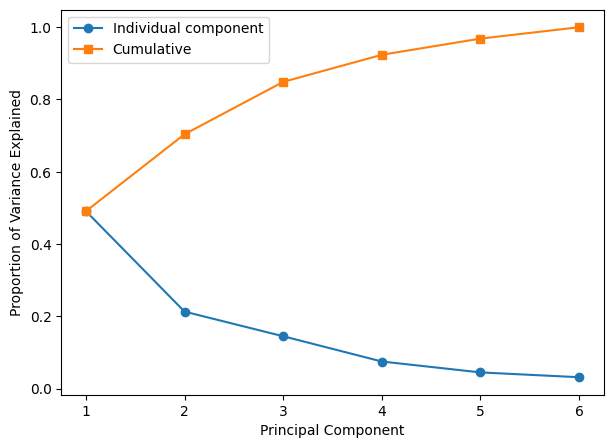

In [27]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')

plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

Using 'elbow' rule we choose the number of principal components=2.

In [28]:
# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.70) + 1

print("Number of components to explain at least 70% of the variance:", num_components)

Number of components to explain at least 70% of the variance: 2


Based on scree plot and explained variance ratio, number of components should be 2.

In [29]:
# Loadings of the principal components
loadings = pca.components_

# Extract loadings for the second principal component
second_pc_loadings = loadings[1]

# Get the index of the variable with the maximum absolute loading
most_influential_variable_index = np.argmax(np.abs(second_pc_loadings))

# Get the name of the variable with the most significant influence
most_influential_variable = bank.columns[most_influential_variable_index]

# Print the most influential variable and its loading
print("Most influential variable on the second principal component:", most_influential_variable)
print("Loading:", second_pc_loadings[most_influential_variable_index])


Most influential variable on the second principal component: Length
Loading: 0.8154949685223519


'Length' has the most significant influence since it has the highest loading value (0.815495) on PC2 as seen in the loading vectors, ie. strongest correlation with the second principal component. 

In [30]:
proportion = np.sum(pca.explained_variance_ratio_[:2])
print(proportion)


0.7039403303350009


Proportion of total variance explained by the first two principal components is roughly 70.39%.

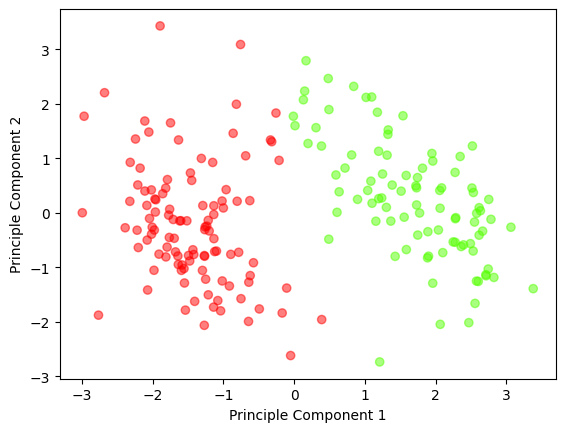

In [94]:
p_comp = pca.fit_transform(bank)
pca_comp = pd.DataFrame(p_comp)
plt.scatter(pca_comp[0], pca_comp[1], alpha=.5, c=km1.labels_, cmap=plt.cm.prism)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2');

In [50]:
round(adjusted_rand_score(stat['Status'], km1.labels_),2)

0.85

K-means clustering and true labels are fairly comparable. Since ARI is closer to 1 this means K-means clustering assignments strongly agrees with the true labels,